In [25]:
!pip install iminuit

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from iminuit import Minuit
from iminuit.cost import LeastSquares

In [14]:
def par(V,A,b):
    return A*V+b

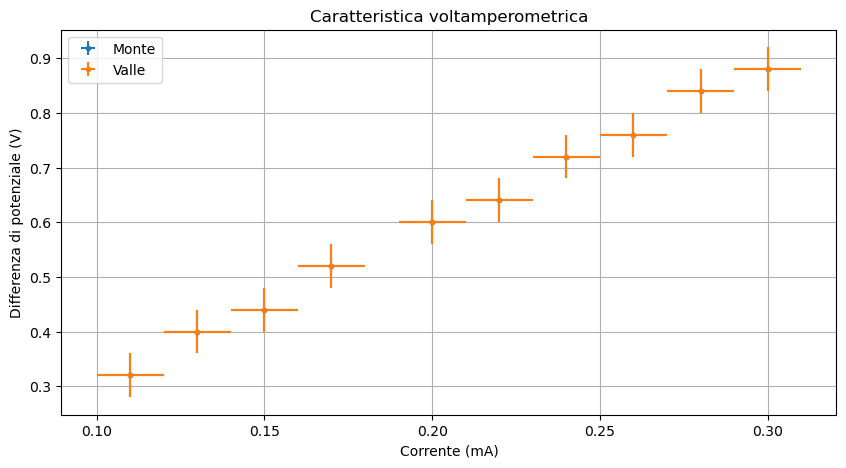

In [15]:
# Resistenza del voltmetro
Rvolt = 20000000
# Resistenza dell'amperometro
Ra = 0.1

#Differenze di potenziali (Uguali per monte e valle)

V = [0.32,0.4,0.44,0.52,0.6,0.64,0.72,0.76,0.84,0.88]
errV = [0.04 for i in range(len(V))]

#Configurazione a monte

I1 = [0.11,0.13,0.15,0.17,0.20,0.22,0.24,0.26,0.28,0.30] 
errI1 = [0.01 for i in range(len(I1))]
plt.figure(figsize = (10,5))
plt.errorbar(I1, V, xerr=errI1, yerr=errV, fmt='o', markersize=3, label='Monte')

#Configurazione a valle

I2 = [0.11,0.13,0.15,0.17,0.20,0.22,0.24,0.26,0.28,0.30] 
errI2 = [0.01 for i in range(len(I2))]
plt.errorbar(I2, V, xerr=errI2, yerr=errV, fmt='o', markersize=3, label='Valle')

plt.legend()
plt.title("Caratteristica voltamperometrica")
plt.xlabel("Corrente (mA)")
plt.ylabel("Differenza di potenziale (V)")
plt.grid(1)

In [16]:
#Analisi dati monte
least_squares1 = LeastSquares(V, I1, errI1, par)
m1 = Minuit(least_squares1, A = 3, b = 0)
m1.migrad()
m1.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.197 (χ²/ndof = 0.1)      │              Nfcn = 67               │
│ EDM = 5.48e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   0.341   │   0.017   │   -0.017   │   0.017    │         │         │       │
│ 1 │ b    │  -0.003   │   0.011   │   -0.011   │   0.011    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           A           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.017   │   0.017   │  -0.011   │   0.011   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────┐
│   │        A        b │
├───┼───────────────────┤
│ A │ 0.000306 -0.19e-3 │
│ b │ -0.19e-3 0.000125 │
└───┴───────────────────┘

In [20]:
least_squares2 = LeastSquares(V, I2, errI2, par)
m2 = Minuit(least_squares2, A = 3, b = 0)
m2.migrad()
m2.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.197 (χ²/ndof = 0.1)      │              Nfcn = 67               │
│ EDM = 5.48e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   0.341   │   0.017   │   -0.017   │   0.017    │         │         │       │
│ 1 │ b    │  -0.003   │   0.011   │   -0.011   │   0.011    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           A           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.017   │   0.017   │  -0.011   │   0.011   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────┐
│   │        A        b │
├───┼───────────────────┤
│ A │ 0.000306 -0.19e-3 │
│ b │ -0.19e-3 0.000125 │
└───┴───────────────────┘

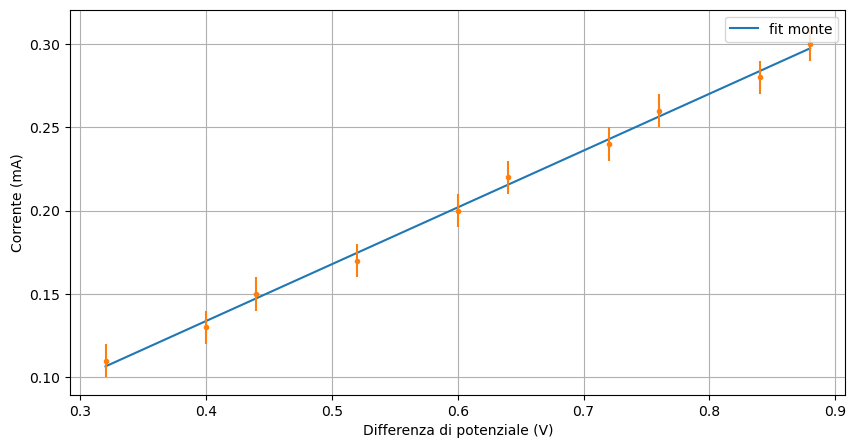

In [23]:
A1, A2 = m1.values['A'], m2.values['A']
b1, b2 = m1.values['b'], m2.values['b']
errA1, errA2 = m1.errors['A'], m2.errors['A']
V = np.array(V)

#grafico monte
I1 = np.array(I1) 
figm, axm = plt.subplots(figsize = (10, 5))
axm.plot(V, A1*V+b1, label = "fit monte")
axm.legend()
axm.errorbar(V, I1, fmt = 'o', markersize = 3, yerr=errI1)
axm.set_xlabel("Differenza di potenziale (V)")
axm.set_ylabel("Corrente (mA)")
axm.grid(1)


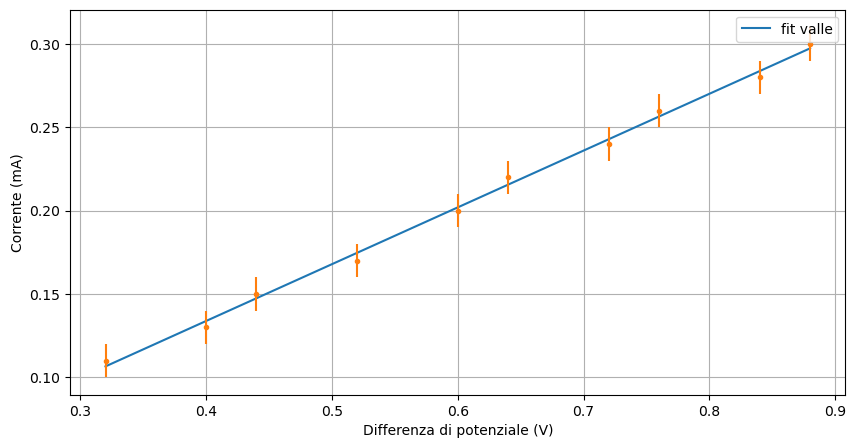

In [25]:
#grafico valle
I2 = np.array(I2) 
figv, axv = plt.subplots(figsize = (10, 5))
axv.plot(V, A2*V+b2, label = "fit valle")
axv.legend()
axv.errorbar(V, I2, fmt = 'o', markersize = 3, yerr=errI2)
axv.set_xlabel("Differenza di potenziale (V)")
axv.set_ylabel("Corrente (mA)")
axv.grid(1)

In [27]:
#Stima delle resistenze incognite
A11, A22 = 1/m1.values['A'], 1/m2.values['A']
b11, b22 = -(1/m1.values['b'])*A11, -(1/m2.values['b'])*A22
errA11, errA22 = (1/A1**2)*errA1, (1/A2**2)*errA2


Rm = (A11 * Rvolt)/(Rvolt - A11)
errRm = ((Rvolt**2)/((Rvolt-A11)**2)) * errA11
Rv = A22 - Ra 
errRv = errA22

In [29]:
#Stima finale tramite media pesata

R = (Rm*errRm + Rv*errRv)/(errRm + errRv)
R

2.8845796618829516